# Notebook 02: Regression Model

**Student Name:** [Your Name]

**Dataset:** [Your Dataset Name]

**Target Variable:** [Your Target Column]

**Checkpoint 3 Due:** Feb 15

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before the checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll be asked to interpret results, justify decisions, and explain your reasoning. **These written reflections are a critical part of your grade.**

Good data scientists don't just run code—they communicate their findings clearly. Take time to write thoughtful, complete responses to all reflection prompts. This demonstrates your understanding and prepares you for real-world stakeholder communication.

---

## Setup

In [107]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Sklearn - models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Sklearn - evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model saving
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## Section 1: Load Processed Data

In [108]:
# Load cleaned data from previous notebook
df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data shape: {df.shape}")
df.head()

Data shape: (7967, 21)


,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,...,Vibe,Total Reservations,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes
0,4.0,38,73.98,2224,23406,13,1.3,7.0,13,4,...,8.3,17,True,False,False,False,False,True,False,True
1,3.2,76,28.11,4416,42741,8,2.6,3.4,48,6,...,6.0,54,False,False,False,False,False,False,True,True
2,4.7,48,48.29,2796,37285,18,5.3,6.7,27,14,...,12.0,41,True,False,False,False,True,False,False,False
3,4.4,34,51.55,1167,15214,13,4.6,2.8,9,17,...,7.4,26,True,False,False,False,True,False,False,True
4,4.9,88,75.98,3639,40171,9,8.6,2.1,37,26,...,10.7,63,False,False,False,False,False,True,False,False


In [109]:
# Define your target variable
TARGET = 'Revenue'  # <-- UPDATE THIS!

print(f"Target: {TARGET}")
print(f"\nTarget statistics:")
print(df[TARGET].describe())

# Store target range for later interpretation
target_range = df[TARGET].max() - df[TARGET].min()
target_std = df[TARGET].std()
print(f"\nTarget range: {target_range:,.2f}")
print(f"Target std: {target_std:,.2f}")

Target: Revenue

Target statistics:
count    7.967000e+03
mean     6.446314e+05
std      2.628430e+05
min      1.847085e+05
25%      4.477130e+05
50%      5.926366e+05
75%      7.966647e+05
max      1.531868e+06
Name: Revenue, dtype: float64

Target range: 1,347,159.03
Target std: 262,843.00


## Section 2: Prepare Features and Target

In [110]:
# Separate features (X) and target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nAll features ({len(X.columns)}):")
print(X.columns.tolist())

Features shape: (7967, 20)
Target shape: (7967,)

All features (20):
['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations', 'Vibe', 'Total Reservations', 'Location_Rural', 'Location_Suburban', 'Cuisine_French', 'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican', 'Parking Availability_Yes']


In [111]:
# Check for any non-numeric columns that need to be handled
non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    print(f"Warning: Non-numeric columns found: {non_numeric}")
    print("You need to encode these or go back to Notebook 01!")
else:
    print("All features are numeric. Ready to proceed!")

All features are numeric. Ready to proceed!


## Section 3: Train-Test Split

Split your data into training and test sets. The training set is used to train the model, and the test set is used to evaluate how well it generalizes to unseen data.

In [112]:
# TODO: Split your data into training and test sets
# 
# Requirements:
# - Use an 80/20 split (test_size=0.2)
# - Set random_state=42 for reproducibility
# - Store results in: X_train, X_test, y_train, y_test
#
# Hint: Use train_test_split(X, y, ...)

# YOUR CODE HERE:
#All features 'Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations', 'Vibe', 'Total Reservations', 'Location_Rural', 'Location_Suburban', 'Cuisine_French', 'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican', 'Parking Availability_Yes'

X_simple = df[['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations', 'Vibe', 'Total Reservations', 'Location_Rural', 'Location_Suburban', 'Cuisine_French', 'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican', 'Parking Availability_Yes']]  # Double brackets = 2D array
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(
X_simple, y, test_size=0.2, random_state=42)



In [113]:
# Verify your split (run this cell to check)
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

Training set: 6,373 samples (80%)
Test set: 1,594 samples (20%)


## Section 4: Feature Scaling

Many ML algorithms perform better when features are on similar scales. StandardScaler transforms features to have mean=0 and std=1.

**Important:** Fit the scaler on training data only, then transform both train and test. This prevents data leakage.

In [114]:
# TODO: Scale your features using StandardScaler
#
# Steps:
# 1. Create a StandardScaler instance
# 2. Fit the scaler on X_train and transform X_train (use fit_transform)
# 3. Transform X_test using the same scaler (use transform only - NOT fit_transform!)
# 4. Store results in: X_train_scaled, X_test_scaled
#
# Why fit only on train? To prevent "data leakage" - test data should be truly unseen.

# YOUR CODE HERE:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [115]:
# Convert back to DataFrame for easier viewing (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify scaling worked
print("Features scaled successfully!")
print(f"\nScaled feature means (should be ~0): {X_train_scaled.mean().mean():.4f}")
print(f"Scaled feature stds (should be ~1): {X_train_scaled.std().mean():.4f}")

Features scaled successfully!

Scaled feature means (should be ~0): 0.0000
Scaled feature stds (should be ~1): 1.0001


## Section 5: Baseline Model

Start with a simple Linear Regression to establish a baseline performance. This gives us a reference point for improvement.

In [116]:
# This helper function evaluates any model - you'll use it throughout this notebook
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train model and return evaluation metrics."""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return results, model, y_test_pred

In [117]:
# TODO: Create and evaluate a baseline Linear Regression model
#
# Steps:
# 1. Create a LinearRegression() model instance
# 2. Use the evaluate_model() function to train and evaluate it
# 3. Store the results
#
# The evaluate_model function returns: (results_dict, trained_model, predictions)

# YOUR CODE HERE:
# baseline_model = ...
# baseline_results, baseline_trained, baseline_preds = evaluate_model(...)

baseline_model = LinearRegression()
baseline_results, baseline_trained, baseline_preds = evaluate_model(baseline_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Linear Regression (Baseline)')



In [118]:
# Display baseline results
print("=" * 50)
print("BASELINE MODEL: Linear Regression")
print("=" * 50)
print(f"Train R²: {baseline_results['Train R2']:.4f}")
print(f"Test R²:  {baseline_results['Test R2']:.4f}")
print(f"Test RMSE: {baseline_results['Test RMSE']:,.2f}")
print(f"Test MAE: {baseline_results['Test MAE']:,.2f}")

# Context for RMSE
print(f"\n--- RMSE in Context ---")
print(f"RMSE as % of target range: {baseline_results['Test RMSE']/target_range*100:.1f}%")
print(f"RMSE as % of target std: {baseline_results['Test RMSE']/target_std*100:.1f}%")

BASELINE MODEL: Linear Regression
Train R²: 0.9577
Test R²:  0.9568
Test RMSE: 55,210.04
Test MAE: 41,789.20

--- RMSE in Context ---
RMSE as % of target range: 4.1%
RMSE as % of target std: 21.0%


### Baseline Interpretation

*Analyze your baseline results:*

**Understanding your metrics:**
- **R² (0 to 1)**: How much variance in target is explained by features. 0.7+ is often considered good.
- **RMSE**: Average prediction error in the same units as your target. Lower is better.
- **RMSE as % of range**: Helps you understand if errors are big or small relative to your data.

**Questions to answer:**
- What does your R² score tell you about how well features explain the target?
- Is there a big gap between train and test R²? (Gap > 0.1 could indicate overfitting)
- Is your RMSE reasonable? (e.g., if predicting house prices, is a $20K error acceptable?)

**Your interpretation:**
The R score of .95 plus says that it is proprtly catching the patterns in the data. No it seems pretty reasonable I think it is not too bad. The R squared value is reasonable. It is only .001 of eeach other. So overfitting seems unlikely. 
The RMSE number is around 40K to 50K variance. This model is predicting an entire restranuts revenue. So I think we can expect a good bit of space for there to be variance. The average amount for the target is about 650K, a 40K or 50K variance I think is acceptable given how big the average target is. 

## Section 6: Model Iteration

Try at least 2-3 different models to see if you can improve on the baseline.

In [119]:
# Store all results for comparison
all_results = [baseline_results]

# Dictionary to store trained models
trained_models = {
    'Linear Regression (Baseline)': baseline_trained
}

### Model 2: Ridge Regression

Ridge adds L2 regularization to prevent overfitting by penalizing large coefficients.

In [120]:
# TODO: Create and evaluate a Ridge Regression model
#
# Create a Ridge model with alpha=1.0
# Use evaluate_model() to train and evaluate
# Add results to all_results list
# Add trained model to trained_models dict

# YOUR CODE HERE:

ridge_model = Ridge(alpha=1.0)
ridge_results, ridge_trained, ridge_preds = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Ridge Regression')
all_results.append(ridge_results)
trained_models['Ridge Regression'] = ridge_trained


# Print results
print(f"Ridge Regression - Test R²: {ridge_results['Test R2']:.4f}, Test RMSE: {ridge_results['Test RMSE']:,.2f}")

Ridge Regression - Test R²: 0.9568, Test RMSE: 55,204.91


### Model 3: Lasso Regression

Lasso adds L1 regularization, which can zero out unimportant features (automatic feature selection).

In [121]:
# TODO: Create and evaluate a Lasso Regression model
#
# Create a Lasso model with alpha=0.1
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:
lasso_model=Lasso(alpha=0.1)
lasso_results, lasso_trained, lasso_preds = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Lasso Regression')
all_results.append(lasso_results)
trained_models['Lasso Regression'] = lasso_trained

# Print results
print(f"Lasso Regression - Test R²: {lasso_results['Test R2']:.4f}, Test RMSE: {lasso_results['Test RMSE']:,.2f}")

# Show which features Lasso kept (non-zero coefficients)
lasso_coefs = pd.Series(lasso_trained.coef_, index=X.columns)
kept_features = lasso_coefs[lasso_coefs != 0]
print(f"\nLasso kept {len(kept_features)} of {len(X.columns)} features")

Lasso Regression - Test R²: 0.9568, Test RMSE: 55,209.97

Lasso kept 18 of 20 features


### Model 4: Decision Tree

In [122]:
# TODO: Create and evaluate a Decision Tree model
#
# Create a DecisionTreeRegressor with max_depth=10 and random_state=42
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# Create and train the 

# Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate
dt_accuracy = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Decision Tree')[0]['Test R2']
print(f"Decision Tree Accuracy: {dt_accuracy:.2%}")

# Print results
dt_results, dt_trained, dt_preds = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Decision Tree')

#print(f"Decision Tree - Test R²: {dt_results['Test R2']:.4f}, Test RMSE: {dt_results['Test RMSE']:,.2f}")

Decision Tree Accuracy: 96.25%


### Model 5: Random Forest

In [123]:
# TODO: Create and evaluate a Random Forest model
#
# Create a RandomForestRegressor with:
#   - n_estimators=100
#   - max_depth=10
#   - random_state=42
#   - n_jobs=-1 (use all CPU cores)
#
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate
rf_accuracy = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test,model_name='Random Forest')[0]['Test R2']
print(f"Random Forest Accuracy: {rf_accuracy:.2%}")

# Print results
rf_results, rf_trained, rf_preds = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Random Forest')
print(f"Random Forest - Test R²: {rf_results['Test R2']:.4f}, Test RMSE: {rf_results['Test RMSE']:,.2f}")

Random Forest Accuracy: 99.91%
Random Forest - Test R²: 0.9991, Test RMSE: 7,808.75


### Add Your Own Model (Optional)

*Feel free to try additional models or tune hyperparameters!*

In [124]:
# YOUR ADDITIONAL MODEL HERE:
# Try GradientBoostingRegressor, different hyperparameters, etc.
from sklearn.metrics import accuracy_score

# Train Gradient Boosting Classifier
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)
gb_acc = r2_score(y_test,y_pred)

print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")



Gradient Boosting Accuracy: 0.9985


In [125]:
y_pred=gb.predict(X_train)
gb_acc = r2_score(y_train,y_pred)

print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")


Gradient Boosting Accuracy: 0.9987


## Section 7: Cross-Validation (More Robust Evaluation)

Cross-validation gives us a more reliable estimate of model performance by testing on multiple different train/test splits.

In [126]:
# Perform 5-fold cross-validation on top models
print("5-Fold Cross-Validation Results:")
print("=" * 50)

cv_results = []

models_to_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
}

for name, model in models_to_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_results.append({
        'Model': name,
        'CV Mean R²': scores.mean(),
        'CV Std R²': scores.std()
    })
    print(f"{name}: R² = {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

cv_df = pd.DataFrame(cv_results)

5-Fold Cross-Validation Results:
Linear Regression: R² = 0.9573 (+/- 0.0030)
Ridge: R² = 0.9573 (+/- 0.0030)
Random Forest: R² = 0.9989 (+/- 0.0001)


**Why Cross-Validation Matters:**
- A model that performs well on one train/test split might just be lucky
- CV tests on 5 different splits, giving us confidence in the results
- Lower standard deviation = more consistent/reliable model

## Section 8: Model Comparison

In [127]:
# Create comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test R2', ascending=False)

print("Model Comparison:")
results_df

Model Comparison:


,Model,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Linear Regression (Baseline),0.9577,0.9568,53934.0403,55210.0436,40653.1015,41789.1987
1,Ridge Regression,0.9577,0.9568,53934.2884,55204.9063,40647.7792,41778.4463
2,Lasso Regression,0.9577,0.9568,53934.0404,55209.9706,40653.0448,41789.0748


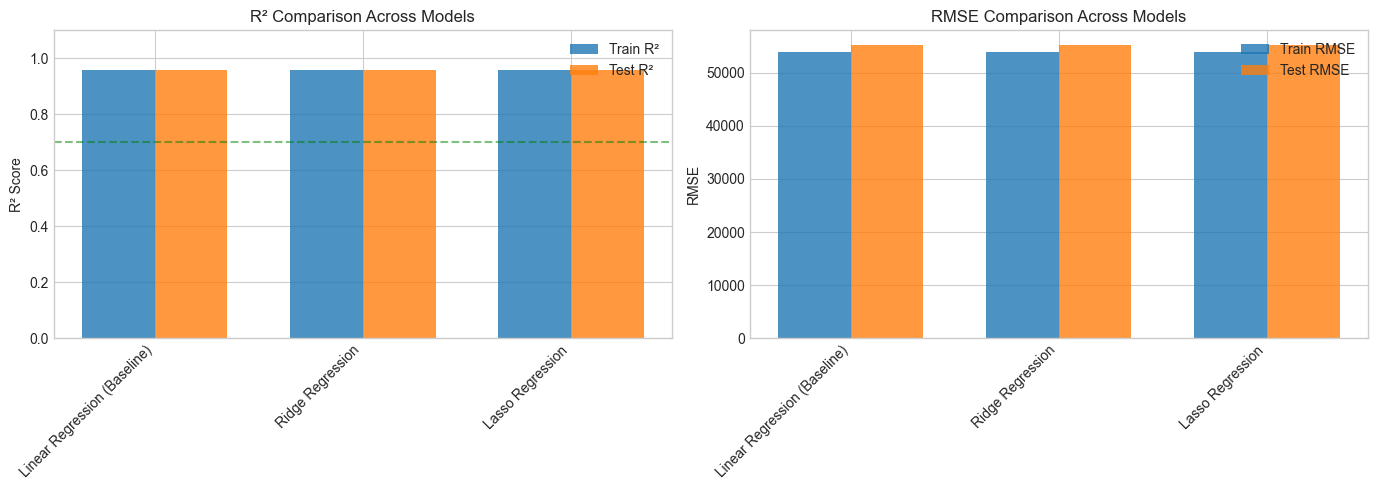

In [128]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Comparison
models = results_df['Model']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, results_df['Train R2'], width, label='Train R²', alpha=0.8)
axes[0].bar(x + width/2, results_df['Test R2'], width, label='Test R²', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Comparison Across Models')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Good threshold')

# RMSE Comparison
axes[1].bar(x - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.8)
axes[1].bar(x + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.8)
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison Across Models')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

### Model Iteration Reflection

*Before selecting your best model, reflect on what you learned:*

**Questions to answer:**
- Which model improved most over the baseline?
- Did any models show signs of overfitting (big train vs test gap)?
- Did regularization (Ridge/Lasso) help or hurt performance?
- Did tree-based models (Decision Tree, Random Forest) work better than linear models?



**Your reflection:**

The random forest preformed the best.  
The Random forest worrried me about overfitting becuase it was scorring at a 99 plus score on the R squared score. 
Ridge Regression performed the best overall.
Lowest Test RMSE → 55204.9063 
Lowest Test MAE → 41778.4463
This did not make much of a difference. The variance is pretty tight.
Yes, the decision tree did the best.  

Overall, the Random forest far outprformed, I am a bit worried about overfitting. The Ridge vs Lasso have minimal effects but very slightly imrpvoed the RMSE. 




## Section 9: Feature Importance & Selection

**Important:** Your final model should use only **4-8 features**. This section helps you identify which features matter most.

Feature Importance (Random Forest):
                     Feature  Importance
1           Seating Capacity    0.510767
2         Average Meal Price    0.486701
13         Location_Suburban    0.000568
16           Cuisine_Italian    0.000287
5      Chef Experience Years    0.000253
7      Service Quality Score    0.000133
6             Ambience Score    0.000132
8       Weekend Reservations    0.000132
9       Weekday Reservations    0.000129
4     Social Media Followers    0.000128
3           Marketing Budget    0.000126
11        Total Reservations    0.000126
10                      Vibe    0.000122
0                     Rating    0.000119
17          Cuisine_Japanese    0.000086
14            Cuisine_French    0.000082
12            Location_Rural    0.000080
19  Parking Availability_Yes    0.000023
15            Cuisine_Indian    0.000005
18           Cuisine_Mexican    0.000003


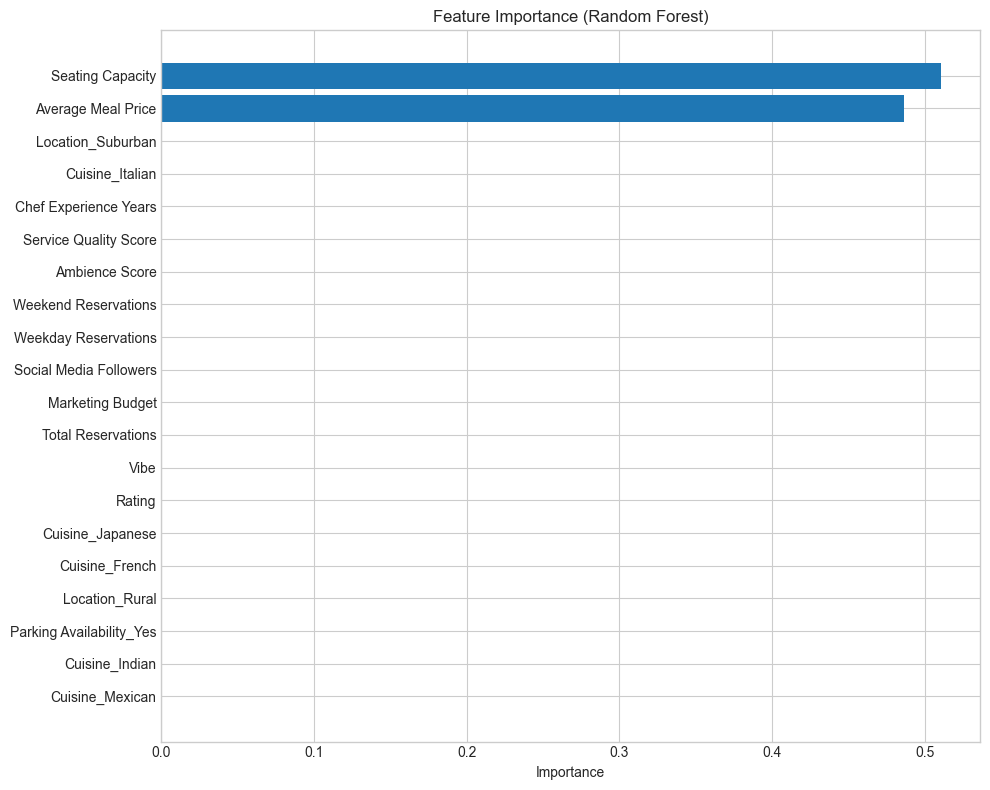

In [129]:
# Get feature importance from Random Forest (works well for this)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_trained.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(rf_importance)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(rf_importance['Feature'][::-1], rf_importance['Importance'][::-1])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [130]:
# Also check correlations with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Absolute Correlations with Target:")
print(correlations)

Absolute Correlations with Target:
Average Meal Price          0.682393
Seating Capacity            0.672731
Location_Rural              0.534288
Cuisine_Japanese            0.458011
Cuisine_Mexican             0.378948
Total Reservations          0.364354
Marketing Budget            0.328851
Social Media Followers      0.314668
Weekend Reservations        0.298217
Cuisine_French              0.279564
Weekday Reservations        0.263472
Cuisine_Indian              0.263346
Cuisine_Italian             0.057687
Rating                      0.035397
Chef Experience Years       0.026033
Parking Availability_Yes    0.006709
Location_Suburban           0.004034
Ambience Score              0.001758
Service Quality Score       0.000851
Vibe                        0.000639
dtype: float64


In [131]:
# TODO: Select your top features (4-8 features)
#
# Based on the importance analysis above, choose your best features.
# Consider both Random Forest importance AND correlations.
# Also think about what makes sense from a domain perspective.

SELECTED_FEATURES = [
    # YOUR FEATURES HERE - add 4-8 feature names:
    # 'feature1',
    #I tried the below and they gave me a worse score then the top 6
    #'Average Meal Price',
    #'Seating Capacity',
    #'Total Reservations',
    #'Marketing Budget',
    #'Social Media Followers',
    #'Location_Rural',

    # etc.
]

# Fallback if you haven't selected yet
if len(SELECTED_FEATURES) == 0:
    SELECTED_FEATURES = rf_importance['Feature'].head(6).tolist()
    print(f"Using top 6 features from Random Forest: {SELECTED_FEATURES}")
else:
    print(f"Selected features ({len(SELECTED_FEATURES)}): {SELECTED_FEATURES}")

Using top 6 features from Random Forest: ['Seating Capacity', 'Average Meal Price', 'Location_Suburban', 'Cuisine_Italian', 'Chef Experience Years', 'Service Quality Score']


In [132]:
# Retrain with selected features only
X_train_selected = X_train_scaled[SELECTED_FEATURES]
X_test_selected = X_test_scaled[SELECTED_FEATURES]

print(f"Training with {len(SELECTED_FEATURES)} selected features...")

# Test a few models with selected features
selected_results = []

for name, model in [('Linear Regression', LinearRegression()),
                    ('Ridge', Ridge(alpha=1.0)),
                    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))]:
    results, trained, _ = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, name)
    selected_results.append(results)
    print(f"{name} with {len(SELECTED_FEATURES)} features - Test R²: {results['Test R2']:.4f}")

selected_df = pd.DataFrame(selected_results)

Training with 6 selected features...
Linear Regression with 6 features - Test R²: 0.9571
Ridge with 6 features - Test R²: 0.9571
Random Forest with 6 features - Test R²: 0.9992


### Feature Selection Justification

**Questions to answer:**
- Which features did you select and why?
- Did performance drop significantly with fewer features?
- Do these features make sense from a domain perspective?
- These are the features users will input in your Streamlit app—are they reasonable to ask for?

**Your justification:**

I selected the top 6. I think the top 6 make alot of sense. The amount of meals and how many people you can seat makes sense that this is the main factor. Reveune is basically the amount of people paying (seating capacity) multipled by the amount of the good or service they are buying (average cost per meal). 

The location of suburban makes sense. The suburbs are normally a wealthy place with working people and usually families. Which means more people in a party. This makes sense that this has a linear releationship with revenue. 

Chef years of experience and service quality make sense becuase both of these will effect people's willingness to pay and if they want to stay longer in the restruant. The longer people are in the restruant the more they will buy most likely. The chef experience most likely corrolates with quality of the food which makes people want to buy more and then quality of the service has to do with the enjoyable vibe of the resruant which also makes people want to stay longer and maybe buy more drinks. 

Overall in all honesty, Avg Meal Price and Seating Capacity carried the day. The score barely moved when I removed everyting except those two features. 

## Section 10: Best Model Selection

In [133]:
# TODO: Choose and train your final model with selected features
#
# Based on your analysis, pick the best model type and instantiate it.
# Consider: performance, consistency, simplicity
#
# Example: final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# YOUR CODE HERE:
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train_scaled, y_train)

# Make predictions
final_predictions = rf_model.predict(X_test_scaled)

# Evaluate
final_accuracy = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test,model_name='Random Forest')[0]['Test R2']
print(f"Random Forest Accuracy: {rf_accuracy:.2%}")

# Print results
#final_results, rf_trained, rf_preds = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Random Forest')
#print(f"Random Forest - Test R²: {rf_results['Test R2']:.4f}, Test RMSE: {rf_results['Test RMSE']:,.2f}")



Random Forest Accuracy: 99.91%


In [134]:
# Fit and evaluate final model
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Final metrics
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_mae = mean_absolute_error(y_test, y_pred)

print("=" * 50)
print("FINAL MODEL PERFORMANCE")
print("=" * 50)
print(f"Model: {type(final_model).__name__}")
print(f"Features: {SELECTED_FEATURES}")
print(f"\nTest R²: {final_r2:.4f}")
print(f"Test RMSE: {final_rmse:,.2f}")
print(f"Test MAE: {final_mae:,.2f}")
print(f"\nRMSE as % of target range: {final_rmse/target_range*100:.1f}%")

FINAL MODEL PERFORMANCE
Model: RandomForestRegressor
Features: ['Seating Capacity', 'Average Meal Price', 'Location_Suburban', 'Cuisine_Italian', 'Chef Experience Years', 'Service Quality Score']

Test R²: 0.9993
Test RMSE: 6,871.98
Test MAE: 5,191.96

RMSE as % of target range: 0.5%


### Best Model Justification

*Explain why you chose this model as your best:*

**Questions to consider:**
- Why did you select this model over others?
- Is there significant overfitting (train vs test gap)?
- How does the performance compare to your baseline?
- Would a simpler model be almost as good?
- Does the RMSE represent acceptable prediction error for your problem?

**Your justification:**

It blew the other stats out of the water with the R squared score and the RSME. 

I don't think there is overfitting the test data is scoring very high as well. 

The random forest model outperformed the baseline model by almost 5 whole precents. I think simple from the standpoint of less features, yes. Simple from the type of model used no. I think this was needed to do this. 

The RMSE I think is reasonable. The average amount of revenue is 650K. The RMSE of 6K is very good. The RSME as a % of target is a fraction of a precent so I think it is very good in this case. Again this is predicting the entire revenue of an whole restruant. So getting that off by 6K is not too bad. 

## Section 11: Best Model Analysis

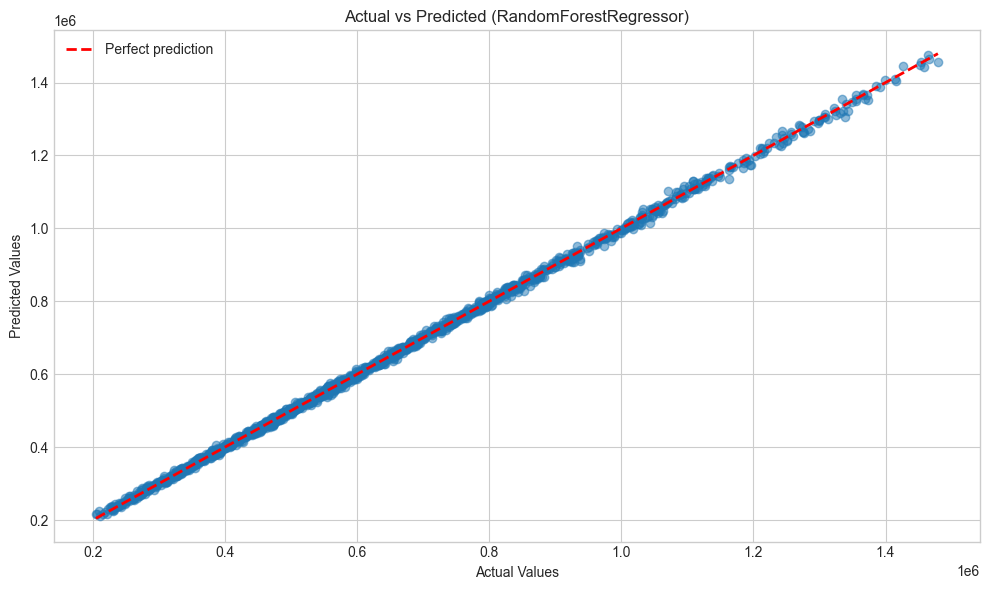

In [135]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted ({type(final_model).__name__})')
plt.legend()
plt.tight_layout()
plt.show()

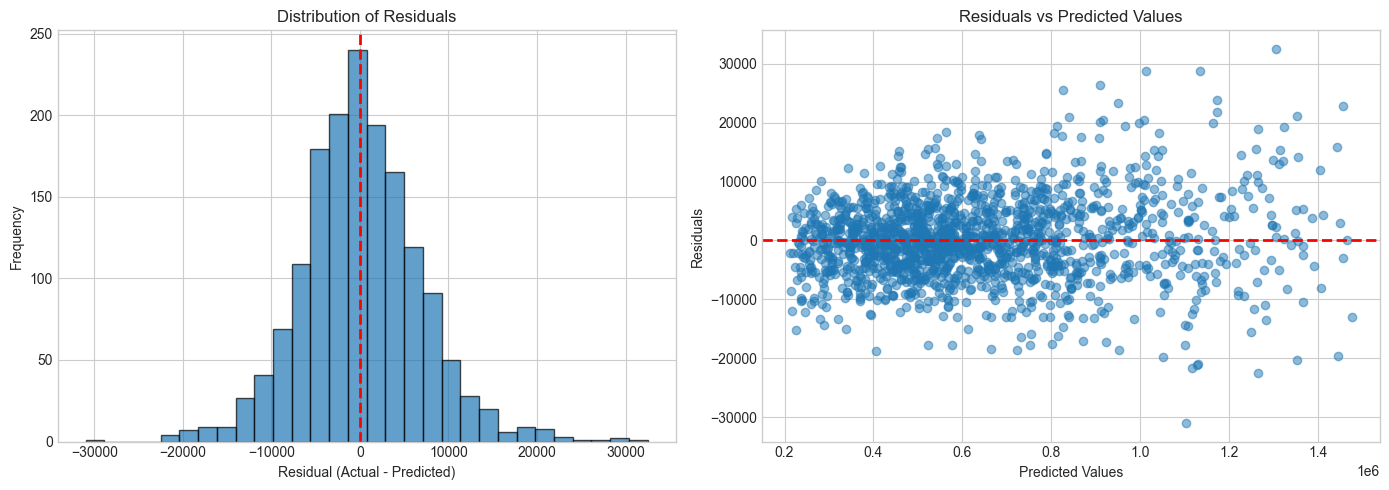

Residual mean (should be ~0): 141.23
Residual std: 6,872.69


In [136]:
# Residual analysis
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual distribution (should be roughly normal, centered at 0)
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residual (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')

# Residuals vs Predicted (should show no pattern)
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

print(f"Residual mean (should be ~0): {residuals.mean():.2f}")
print(f"Residual std: {residuals.std():,.2f}")

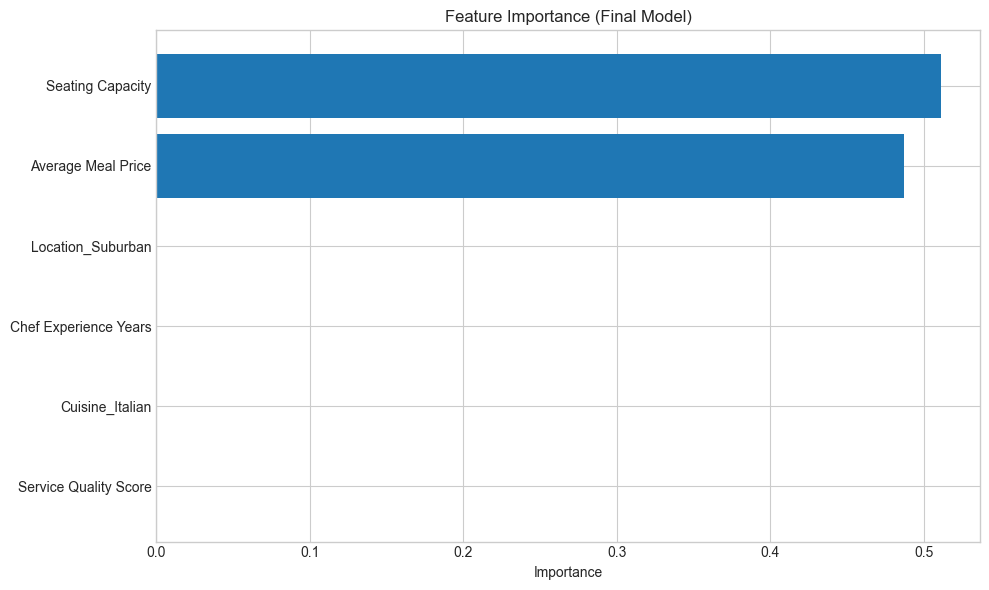

In [137]:
# Feature importance for final model (with selected features)
if hasattr(final_model, 'feature_importances_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(final_importance['Feature'], final_importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance (Final Model)')
    plt.tight_layout()
    plt.show()
elif hasattr(final_model, 'coef_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Coefficient': final_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in final_importance['Coefficient']]
    plt.barh(final_importance['Feature'], final_importance['Coefficient'], color=colors)
    plt.xlabel('Coefficient')
    plt.title('Feature Coefficients (Final Model)')
    plt.tight_layout()
    plt.show()

## Section 12: Save Model and Artifacts

In [138]:
# Create a new scaler fitted only on selected features
final_scaler = StandardScaler()
X_train_final = X_train[SELECTED_FEATURES]
final_scaler.fit(X_train_final)

# Save the best model
model_path = '../models/regression_model.pkl'
joblib.dump(final_model, model_path)
print(f"Model saved to {model_path}")

# Save the scaler (fitted on selected features only)
scaler_path = '../models/regression_scaler.pkl'
joblib.dump(final_scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save feature names (the selected features for Streamlit app)
features_path = '../models/regression_features.pkl'
joblib.dump(SELECTED_FEATURES, features_path)
print(f"Features saved to {features_path}")

Model saved to ../models/regression_model.pkl
Scaler saved to ../models/regression_scaler.pkl
Features saved to ../models/regression_features.pkl


In [139]:
# Verify saved model works
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
loaded_features = joblib.load(features_path)

# Test prediction
test_sample = X_test[loaded_features].iloc[[0]]
test_sample_scaled = loaded_scaler.transform(test_sample)
test_pred = loaded_model.predict(test_sample_scaled)

print(f"\nModel verification:")
print(f"Features used: {loaded_features}")
print(f"Sample input: {test_sample.values[0]}")
print(f"Predicted: {test_pred[0]:,.2f}")
print(f"Actual: {y_test.iloc[0]:,.2f}")
print(f"\nModel saved and verified successfully!")


Model verification:
Features used: ['Seating Capacity', 'Average Meal Price', 'Location_Suburban', 'Cuisine_Italian', 'Chef Experience Years', 'Service Quality Score']
Sample input: [37 34.21 False False 7 7.8]
Predicted: 300,777.56
Actual: 297,770.45

Model saved and verified successfully!


## Section 13: Binning Strategy for Classification

**IMPORTANT:** Before you start Notebook 03, you need to send your binning strategy to Abishek on Slack for approval by **Feb 15**.

### Analyze Target Distribution

In [140]:
# Look at target distribution to help decide binning
print(f"Target: {TARGET}")
print(f"\nDescriptive Statistics:")
print(y.describe())

print(f"\nPercentiles:")
for p in [10, 25, 33, 50, 67, 75, 90]:
    print(f"{p}th percentile: {y.quantile(p/100):,.2f}")

Target: Revenue

Descriptive Statistics:
count    7.967000e+03
mean     6.446314e+05
std      2.628430e+05
min      1.847085e+05
25%      4.477130e+05
50%      5.926366e+05
75%      7.966647e+05
max      1.531868e+06
Name: Revenue, dtype: float64

Percentiles:
10th percentile: 341,739.93
25th percentile: 447,713.02
33th percentile: 494,051.82
50th percentile: 592,636.55
67th percentile: 726,510.10
75th percentile: 796,664.68
90th percentile: 1,028,855.91


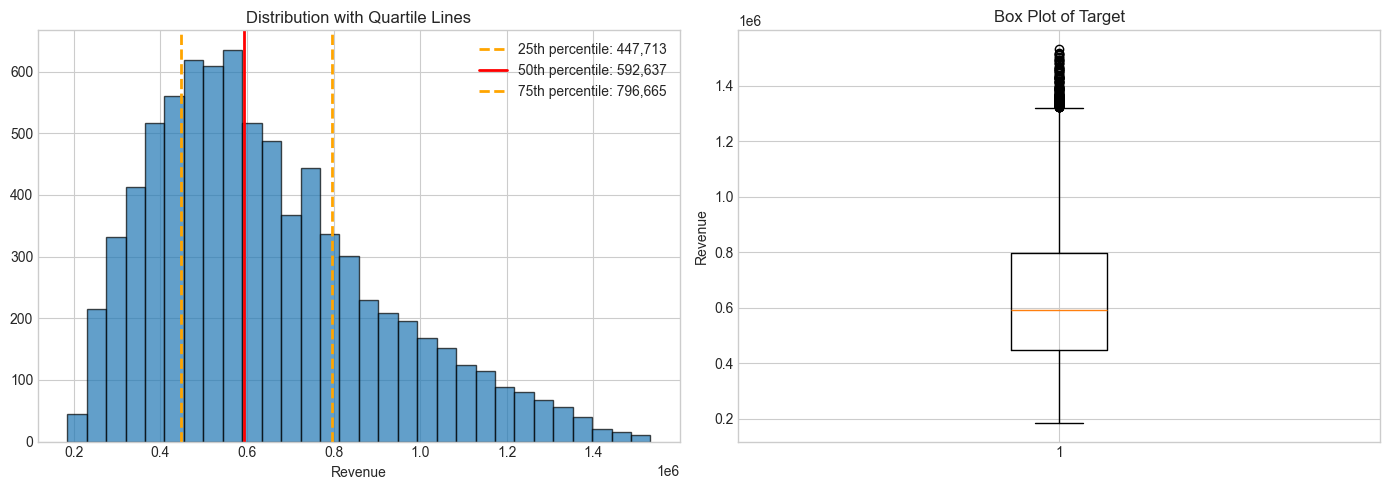

In [141]:
# Visualize potential binning strategies
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with quartile lines
axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7)
for p, color, style in [(25, 'orange', '--'), (50, 'red', '-'), (75, 'orange', '--')]:
    axes[0].axvline(y.quantile(p/100), color=color, linestyle=style, linewidth=2,
                     label=f'{p}th percentile: {y.quantile(p/100):,.0f}')
axes[0].set_xlabel(TARGET)
axes[0].set_title('Distribution with Quartile Lines')
axes[0].legend()

# Box plot
axes[1].boxplot(y)
axes[1].set_ylabel(TARGET)
axes[1].set_title('Box Plot of Target')

plt.tight_layout()
plt.show()

### Proposed Binning Strategy

*Complete this section and send to Abishek on Slack by Feb 15:*

**1. How many categories will you create?**

[Your answer - e.g., 3 categories: Low, Medium, High]
Low, Medium Low:, Medium High:, High:

**2. What are your bin thresholds?**

[Your answer - e.g., Low: < $30,000, Medium: $30,000-$60,000, High: > $60,000]
Low: 0 Percentile to 25th Percentile, Medium Low: 25th Percentile to 50th Percentile, Medium High: 50th Percentile to 75th Percentile and then High: 75th Percentile to 100th Percentile

**3. Why does this binning make sense for your problem?**

[Your answer - explain the domain reasoning. Why are these meaningful categories?]

I think these are relevent. Becuase at the end of the day, if a restruant owner is thinking of seeing and opening up a restruant, they will want to know what threshold they will most likely fall in under. 

In [ ]:
# Preview your binning
def create_bins_preview(y, strategy='quartile'):
    if strategy == 'quartile':
        bins = [y.min()-1, y.quantile(0.25), y.quantile(0.75), y.max()+1]
        labels = ['Low', 'Medium', 'High']
    elif strategy == 'tertile':
        bins = [y.min()-1, y.quantile(0.33), y.quantile(0.67), y.max()+1]
        labels = ['Low', 'Medium', 'High']
    
    # Add your custom strategy here if needed
    
    return pd.cut(y, bins=bins, labels=labels)

# Preview with quartile binning
y_binned = create_bins_preview(y, 'quartile')
print("Preview of binned target (using quartiles):")
print(y_binned.value_counts().sort_index())
print(f"\nPercentages:")
print((y_binned.value_counts(normalize=True) * 100).round(1).sort_index())

Preview of binned target (using quartiles):
Revenue
Low       1992
Medium    3983
High      1992
Name: count, dtype: int64

Percentages:
Revenue
Low       25.0
Medium    50.0
High      25.0
Name: proportion, dtype: float64


---

## Summary

### What You Accomplished
- [ ] Loaded and prepared cleaned data
- [ ] Split data into train and test sets
- [ ] Scaled features appropriately
- [ ] Built a baseline model
- [ ] Tried multiple model types
- [ ] Performed cross-validation
- [ ] Selected top 4-8 features
- [ ] Compared and selected best model
- [ ] Analyzed model performance (residuals, feature importance)
- [ ] Saved model, scaler, and feature list
- [ ] Planned binning strategy for classification

### Key Results

**Best Model:** [Random Forest Model]

**Selected Features:** ['Seating Capacity', 'Average Meal Price', 'Location_Suburban', 'Cuisine_Italian', 'Chef Experience Years', 'Service Quality Score']

**Test R²:** [0.9993]

**Test RMSE:** [6,871.98]

**Improvement over baseline:** [Baseline is R Squared of 0.9568 and RMSE of 55,210.04. Random Forest Model is R Squared of 0.9993 and RMSE of 6,871.98. The RMSE is about 8 times better. The R Squared improved by 0.0425. ]


---

---

## Checkpoint 3 Submission Instructions

**Congratulations!** You've completed Checkpoint 3 (Regression Model).

### Step 1: Save This Notebook
- File -> Save (or Ctrl+S / Cmd+S)

### Step 2: Send Binning Strategy to Abishek
- Message Abishek on Slack with your binning strategy
- Include: number of categories, thresholds, and justification

### Step 3: Commit to GitHub

```bash
# Stage your changes
git add notebooks/02_regression_model.ipynb
git add models/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 3: Regression model with feature selection"

# Push to GitHub
git push
```

### Step 4: Submit to Canvas
1. Go to the Checkpoint 3 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

1. **Wait for binning approval** from Abishek
2. Move on to **Notebook 03: Classification Model**

---